## Capitulo 4 - Modelamiento 

## Proyecto:  <span style="color:green"> Recarga Telefónica  </span>

### Versión de Python

In [1]:
from platform import python_version
print('La versión de python utilizada ha sido '+str(python_version()))

La versión de python utilizada ha sido 3.7.6


### Importamos las librerías necesarias

In [2]:
from datetime import datetime, timedelta,date
import pandas as pd # version 0.25.1
import matplotlib.pyplot as plt # version 3.1.1
import numpy as np # version 1.17.2 
import seaborn as sns # version 0.9.0

import warnings
warnings.filterwarnings("ignore")


from sklearn.ensemble import GradientBoostingClassifier # version 0.9.0 
from sklearn.tree import DecisionTreeClassifier # version 0.9.0 
from sklearn.ensemble import RandomForestClassifier # version 0.9.0 
from sklearn.linear_model import LogisticRegression # version 0.9.0 
from sklearn.ensemble import AdaBoostClassifier # version 0.9.0 
import xgboost as xgb # version 1.1.1
from sklearn.model_selection import GridSearchCV # version 0.9.0 
from sklearn.model_selection import KFold, cross_val_score, train_test_split # version 0.9.0 
from sklearn.metrics import classification_report,confusion_matrix # version 0.9.0 
import pickle
%matplotlib inline

Importación de archivo con funciones auxiliares

In [3]:
import ancilliary_funtions as afx

In [4]:
df_user = pd.read_csv('df_user.csv').drop(columns='Unnamed: 0')

Podemos apreciar que la muestra posee un desbalance importante de clases, Siendo la clase 0 la mas predominante. Lo cual es lógico en este tipo de sistemas, donde gran parte de los usuarios no realizan recargas con gran recurrencia.

In [5]:
df_user.NextPurchaseDayRange.value_counts("%")

0    0.920983
1    0.079017
Name: NextPurchaseDayRange, dtype: float64

Generamos los conjuntos de entrenamiento y prueba tomando 70% y 30% respectivamente.

In [6]:
X, y = df_user.drop(['ProximaCompra','NextPurchaseDayRange','user_id'],axis=1), df_user.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

Para la fase de modelamiento Se utilizarán los siguientes modelos:

* Decision Tree
* Random Forest
* Gradient Boost
* XGBoost

Los algoritmos de Boosting son de aprendizaje débil y en el caso de gradient boost posee una función de pérdida la cual optimiza y penaliza al modelo cuando comete errores, además ayudan a enfrentar problemas que poseen desbalances en sus clases. En cuanto a Random Forest, es uno de los algoritmos más certeros, el cual corre eficientemente grandes bases de datos y por último el Decision Tree que tiene un bajo costo.

Como métrica de estudio se seleccionó Recall ya que esta nos informa sobre la cantidad de registros que el modelo de clasificación es capaz de identificar y respondería a que porcentaje de clientes registrados que realizan recargas en determinados periodos somos capaces de identificar.

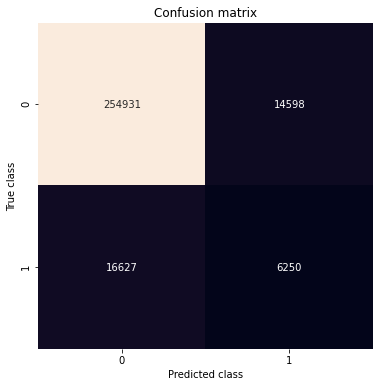

              precision    recall  f1-score   support

           0       0.94      0.95      0.94    269529
           1       0.30      0.27      0.29     22877

    accuracy                           0.89    292406
   macro avg       0.62      0.61      0.61    292406
weighted avg       0.89      0.89      0.89    292406



In [7]:
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_decisiontree = decisiontree.predict(X_test)
report_decisiontree = classification_report(y_test, y_pred_decisiontree, output_dict=True)
afx.mostrar_resultados(y_test,y_pred_decisiontree)

Como se puede apreciar la clase 0 posee muy buenas metricas, el modelo logra predecir correctamente un 86% de los registros, pero cabe destacar que es la clase que mas datos posee.En cuanto a la clase 1 es las que mas corta se queda obteniendo un porcentaje identificativo del 45%. En cuanto a la clase 2, obtenemos un 61%.

Analizando la matriz de confusion este modelo logra identificar correctamente:
* 10459 registro de la clase 0.
* 2426 registro de la clase 1.
* 2921 registro de la clase 2.

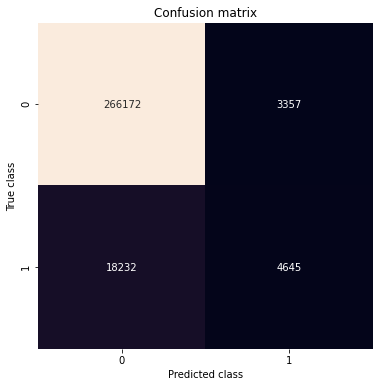

              precision    recall  f1-score   support

           0       0.94      0.99      0.96    269529
           1       0.58      0.20      0.30     22877

    accuracy                           0.93    292406
   macro avg       0.76      0.60      0.63    292406
weighted avg       0.91      0.93      0.91    292406



In [8]:
randomforest = RandomForestClassifier().fit(X_train, y_train)
y_pred_randomforest = randomforest.predict(X_test)
report_randomforest = classification_report(y_test, y_pred_randomforest, output_dict=True)
afx.mostrar_resultados(y_test,y_pred_randomforest)

Realizando un RandomForest los resultados mejoran recordemos que este algoritmo toma una mayor cantidad de árboles,
obtenemos muy buenos resultados en la clase 0 y clase 2, en la clase 1 seguimos teniendo problemas para identificarla pero ya se porcentaje de acierto es mayor que el porcentaje que tendriamos al azar de clasificarla. 

Analizando la matriz de confusión este modelo logra identificar correctamente:
* 10553 registro de la clase 0.
* 2721 registro de la clase 1.
* 3596 registro de la clase 2.

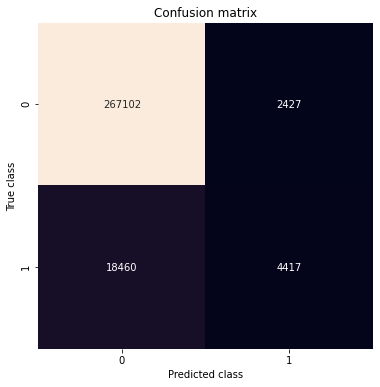

              precision    recall  f1-score   support

           0       0.94      0.99      0.96    269529
           1       0.65      0.19      0.30     22877

    accuracy                           0.93    292406
   macro avg       0.79      0.59      0.63    292406
weighted avg       0.91      0.93      0.91    292406



In [9]:
gradientboost = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_gradientboost = gradientboost.predict(X_test)
report_gradientboost = classification_report(y_test, y_pred_gradientboost, output_dict=True)
afx.mostrar_resultados(y_test, y_pred_gradientboost)

El algoritmo grandient booting posee un leve incremento en cuanto a la metrica recall en comparacion a RandomForest.

Analizando la matriz de confusión este modelo logra identificar correctamente:
* 10515 registro de la clase 0.
* 2863 registro de la clase 1.
* 3731 registro de la clase 2.

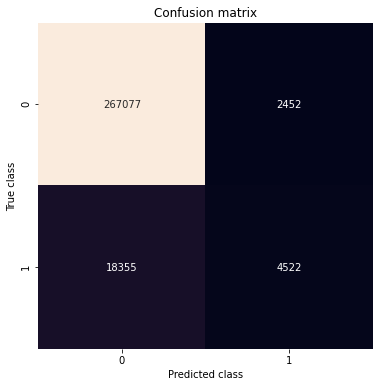

              precision    recall  f1-score   support

           0       0.94      0.99      0.96    269529
           1       0.65      0.20      0.30     22877

    accuracy                           0.93    292406
   macro avg       0.79      0.59      0.63    292406
weighted avg       0.91      0.93      0.91    292406



In [10]:
xgbost = xgb.XGBClassifier().fit(X_train, y_train)
y_pred_xgbost = xgbost.predict(X_test)
report_xgbost = classification_report(y_test, y_pred_xgbost, output_dict=True)
afx.mostrar_resultados(y_test, y_pred_xgbost)

Analizando la matriz de confusion este modelo logra identificar correctamente:
* 10516 registro de la clase 0.
* 2805 registro de la clase 1.
* 3695 registro de la clase 2.

Analicemos los resultados de recall de cada clase, en cada modelo.

In [11]:
recall_decisiontree = [report_decisiontree[i]['recall'] for i in ['0','1']]
recall_randomforest = [report_randomforest[i]['recall'] for i in ['0','1']]
recall_gradientboost = [report_gradientboost[i]['recall'] for i in ['0','1']]
recall_xgbost = [report_xgbost[i]['recall'] for i in ['0','1']]

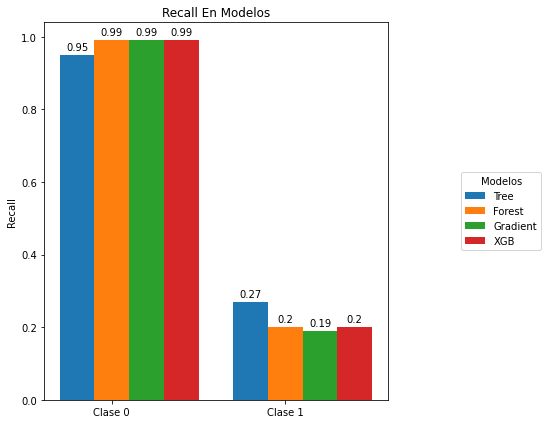

In [12]:
afx.plot_recall_modelos(recall_decisiontree,recall_randomforest,recall_gradientboost,recall_xgbost)

Por los resultados obtenidos, se aprecia mejores desempeños en la clase 2 para los modelos `Gradient Boost` y `XGBoost`, además los dos modelos presentan buenas metricas en las demas clases.

Ahora pasaremos a modelos un poco mas complejos

Primero probaremos realizando under_sampling con NearMiss sobre la clase mayoritaria.

In [13]:
from imblearn.under_sampling import NearMiss # version 0.5.0

Se realiza el undersampling en los vectores correspondientes a los atributos de cada cliente y el vector objetivo

In [14]:
undersampler = NearMiss(sampling_strategy='majority')
X_train_undersamp, y_train_undersamp = undersampler.fit_sample(X, y)

Se realiza la partición de entrenamiento y prueba sobre los vectores undersampleados.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train_undersamp,
                                                   y_train_undersamp, test_size=0.3, random_state=12345)

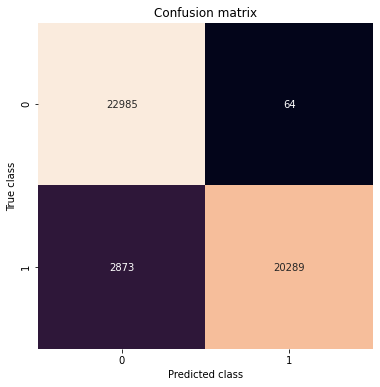

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     23049
           1       1.00      0.88      0.93     23162

    accuracy                           0.94     46211
   macro avg       0.94      0.94      0.94     46211
weighted avg       0.94      0.94      0.94     46211



In [16]:
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_decisiontree = decisiontree.predict(X_test)
report_decisiontree = classification_report(y_test, y_pred_decisiontree, output_dict=True)
afx.mostrar_resultados(y_test,y_pred_decisiontree)

Realizando undersampling logramos aumentar el recall de la clase 1 al costo de bajar un pequeño porcentaje en las demas clases.

Analizando la matriz de confusión este modelo logra identificar correctamente:
* 3460 registro de la clase 0.
* 2753 registro de la clase 1.
* 2834 registro de la clase 2.

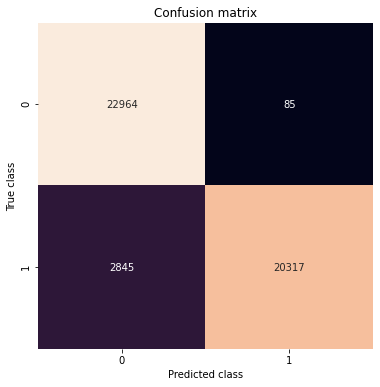

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     23049
           1       1.00      0.88      0.93     23162

    accuracy                           0.94     46211
   macro avg       0.94      0.94      0.94     46211
weighted avg       0.94      0.94      0.94     46211



In [17]:
randomforest = RandomForestClassifier().fit(X_train, y_train)
y_pred_randomforest = randomforest.predict(X_test)
report_randomforest = classification_report(y_test, y_pred_randomforest, output_dict=True)
afx.mostrar_resultados(y_test,y_pred_randomforest)

En cuanto a RandomForest se logra aumentar el recall en la clase 1, y se logran mantener las metricas para la clase 2, el costo fue bajar el recall de la clase 0.

Analizando la matriz de confusión este modelo logra identificar correctamente:
* 3392 registro de la clase 0.
* 3282 registro de la clase 1.
* 3626 registro de la clase 2.

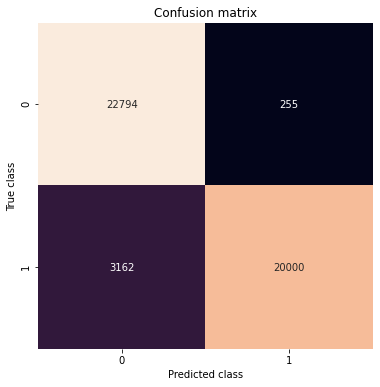

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     23049
           1       0.99      0.86      0.92     23162

    accuracy                           0.93     46211
   macro avg       0.93      0.93      0.93     46211
weighted avg       0.93      0.93      0.93     46211



In [18]:
gradientboost = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_gradientboost = gradientboost.predict(X_test)
report_gradientboost = classification_report(y_test, y_pred_gradientboost, output_dict=True)
afx.mostrar_resultados(y_test, y_pred_gradientboost)

Al igual que RandomForest se logra mejorar el recall de la clase 1 a costo de la clase 0, manteniendo la clase 2.

Analizando la matriz de confusión este modelo logra identificar correctamente:
* 3400 registro de la clase 0.
* 3280 registro de la clase 1.
* 3802 registro de la clase 2.

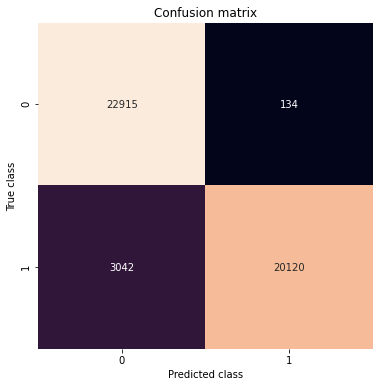

              precision    recall  f1-score   support

           0       0.88      0.99      0.94     23049
           1       0.99      0.87      0.93     23162

    accuracy                           0.93     46211
   macro avg       0.94      0.93      0.93     46211
weighted avg       0.94      0.93      0.93     46211



In [19]:
xgbost = xgb.XGBClassifier().fit(X_train, y_train)
y_pred_xgbost = xgbost.predict(X_test)
report_xgbost = classification_report(y_test, y_pred_xgbost, output_dict=True)
afx.mostrar_resultados(y_test, y_pred_xgbost)

Se puede observar que al realizar el undersampling logramos subir la cantidad de registros predecidos correctamente, a costo de bajar el recall de la clase 0, que fue la clase undersampleada, y en cuanto a la clase 2 oscila por lo mismos resultados que antes.

In [21]:
recall_decisiontree = [report_decisiontree[i]['recall'] for i in ['0','1']]
recall_randomforest = [report_randomforest[i]['recall'] for i in ['0','1']]
recall_gradientboost = [report_gradientboost[i]['recall'] for i in ['0','1']]
recall_xgbost = [report_xgbost[i]['recall'] for i in ['0','1']]

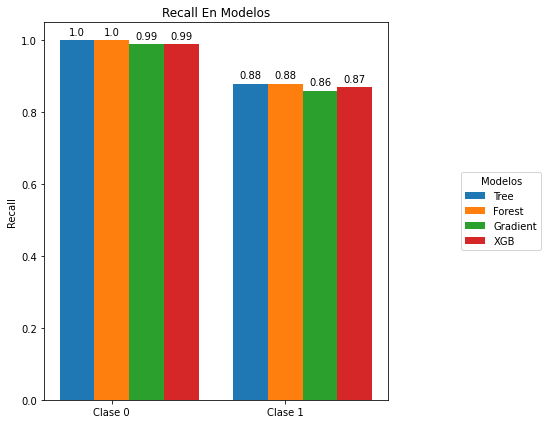

In [22]:
afx.plot_recall_modelos(recall_decisiontree,recall_randomforest,recall_gradientboost,recall_xgbost)

Por los resultados obtenidos, se aprecia mejores desempeños en la clase 2 para los modelos `Gradient Boost` y `XGBoost`, ademas los dos modelos presentan buenas metricas en las demas clases.

Y si realizamos oversampling en las clases minoritarias.

In [23]:
from imblearn.over_sampling import SMOTE # version 0.5.0

Primero realizamos un oversampling en la clase 2 ya que es la que presenta menos datos. esto lo realizamos en los vectores iniciales sin ningun tipo de particion.

In [24]:
oversampler = SMOTE(random_state=12345, sampling_strategy='minority')
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X, y)

De este oversampling realizamos una particion obteniendo el conjunto de train que sera nuevamente oversampleado para aumentar ahora la clase 1, ademas se conservara un conjunto de datos que los modelos no veran, identificados con `final`, este sera utilizado para comprobar los resultado y verificar si el oversampling no provoco overfitting.

In [25]:
X_train, X_test_final, y_train, y_test_final = train_test_split(X_train_oversamp,
                                                   y_train_oversamp, test_size=0.3, random_state=12345)

In [26]:
oversampler = SMOTE(random_state=12345, sampling_strategy='minority')
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

Ahora se realizan las particiones con las que se entrenara y probaran en los modelos, para finalmente probar el conjunto que dejamos de reserva anteriormente.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_train_oversamp,
                                                   y_train_oversamp, test_size=0.3, random_state=12345)

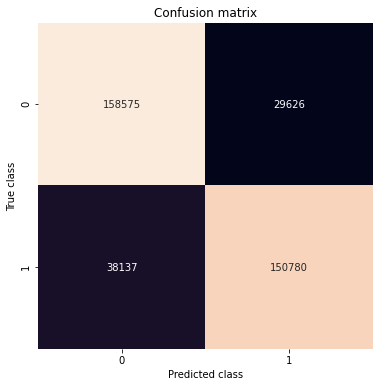

              precision    recall  f1-score   support

           0       0.81      0.84      0.82    188201
           1       0.84      0.80      0.82    188917

    accuracy                           0.82    377118
   macro avg       0.82      0.82      0.82    377118
weighted avg       0.82      0.82      0.82    377118



In [28]:
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_decisiontree = decisiontree.predict(X_test)
report_decisiontree = classification_report(y_test, y_pred_decisiontree, output_dict=True)
afx.mostrar_resultados(y_test,y_pred_decisiontree)

Realizando el oversampling de las clase 1 y 2, se logran mejorar bastante el recall de cada clase en comparación a los modelos pasados, aún sigue teniendo problemas para identificar la clase 1 pero la clase 2, la cual representa a los clientes que probablemente recargarán en un periodo de 0-14 dias logra predecirlo con un 72%

Analizando la matriz de confusión este modelo logra identificar correctamente:
* 7221 registro de la clase 0.
* 5220 registro de la clase 1.
* 6128 registro de la clase 2.

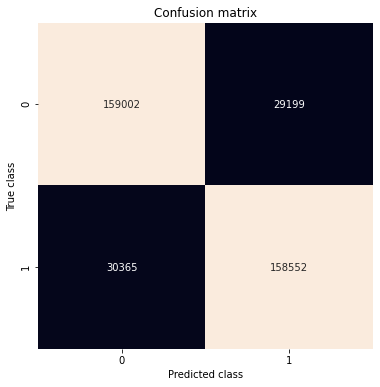

              precision    recall  f1-score   support

           0       0.84      0.84      0.84    188201
           1       0.84      0.84      0.84    188917

    accuracy                           0.84    377118
   macro avg       0.84      0.84      0.84    377118
weighted avg       0.84      0.84      0.84    377118



In [29]:
randomforest = RandomForestClassifier().fit(X_train, y_train)
y_pred_randomforest = randomforest.predict(X_test)
report_randomforest = classification_report(y_test, y_pred_randomforest, output_dict=True)
afx.mostrar_resultados(y_test,y_pred_randomforest)

El cuanto al modelo de RandomForest, en comparación con el modelo anterior, se logra aumentar a un 74% el porcentaje de registros correctamente predecidos de la clase 1, aumentando a su vez la clase 2.

Analizando la matriz de confusión este modelo logra identificar correctamente:
* 7092 registro de la clase 0.
* 6308 registro de la clase 1.
* 7312 registro de la clase 2.

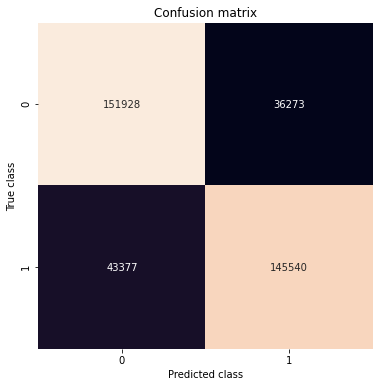

              precision    recall  f1-score   support

           0       0.78      0.81      0.79    188201
           1       0.80      0.77      0.79    188917

    accuracy                           0.79    377118
   macro avg       0.79      0.79      0.79    377118
weighted avg       0.79      0.79      0.79    377118



In [30]:
gradientboost = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_gradientboost = gradientboost.predict(X_test)
report_gradientboost = classification_report(y_test, y_pred_gradientboost, output_dict=True)
afx.mostrar_resultados(y_test, y_pred_gradientboost)

En cuanto a Gradient Boosting logra resultados levemente mejores que el modelo DecisionTree, logrando aumentar el recall en la clase 1 por 4%
y en la clase 2 logra un aumento de 13%. No logra resultados tan buenos como RandomForest

Analizando la matriz de confusion este modelo logra identificar correctamente:
* 7026 registro de la clase 0.
* 5538 registro de la clase 1.
* 7211 registro de la clase 2.

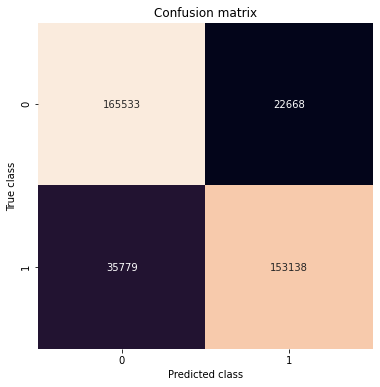

              precision    recall  f1-score   support

           0       0.82      0.88      0.85    188201
           1       0.87      0.81      0.84    188917

    accuracy                           0.85    377118
   macro avg       0.85      0.85      0.84    377118
weighted avg       0.85      0.85      0.84    377118



In [31]:
xgbost = xgb.XGBClassifier().fit(X_train, y_train)
y_pred_xgbost = xgbost.predict(X_test)
report_xgbost = classification_report(y_test, y_pred_xgbost, output_dict=True)
afx.mostrar_resultados(y_test, y_pred_xgbost)

En cuanto a XGBoost logra resultados similares a GradientBoosting

Analizando la matriz de confusión este modelo logra identificar correctamente:
* 7124 registro de la clase 0.
* 5786 registro de la clase 1.
* 7164 registro de la clase 2.

Antes de decidir cuales son los mejores modelos realizaremos las pruebas con el conjunto guardado para comprobación. 

In [32]:
y_pred_decisiontree_testing = decisiontree.predict(X_test_final)
print(classification_report(y_test_final, y_pred_decisiontree_testing))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83    269138
           1       0.84      0.80      0.82    269463

    accuracy                           0.82    538601
   macro avg       0.82      0.82      0.82    538601
weighted avg       0.82      0.82      0.82    538601



In [33]:
y_pred_randomforest_testing = randomforest.predict(X_test_final)
print(classification_report(y_test_final, y_pred_randomforest_testing))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84    269138
           1       0.84      0.84      0.84    269463

    accuracy                           0.84    538601
   macro avg       0.84      0.84      0.84    538601
weighted avg       0.84      0.84      0.84    538601



In [34]:
y_pred_gradientboost_testing = gradientboost.predict(X_test_final)
print(classification_report(y_test_final, y_pred_gradientboost_testing))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79    269138
           1       0.80      0.77      0.79    269463

    accuracy                           0.79    538601
   macro avg       0.79      0.79      0.79    538601
weighted avg       0.79      0.79      0.79    538601



In [35]:
y_pred_xgbost_testing = xgbost.predict(X_test_final)
print(classification_report(y_test_final, y_pred_xgbost_testing))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85    269138
           1       0.87      0.81      0.84    269463

    accuracy                           0.85    538601
   macro avg       0.85      0.85      0.85    538601
weighted avg       0.85      0.85      0.85    538601



Podemos observar que el modelo de RandomForest no resulto ser el mejor ya que estaba teniendo overfitting en la clase 1, y solo logra identificar un 50% de datos nuevo que el modelo no ha visto, En cuanto a Gradientboost y XGBoost estaban teniendo un pequeño porcentaje de overfitting en la clase 1 pero la logra identificar de mejor manera. Cabe destacar que las clases 0 y 2 no bajan de 80% por lo tanto se logra identificar de buena forma.

Ahora si volvemos al inicio con nuestro datos crudos pero probamos modelos con grillas personalizadas.

In [36]:
X, y = df_user.drop(['ProximaCompra','NextPurchaseDayRange','user_id'],axis=1), df_user.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

La primera Grilla se presenta a continuación, de forma representaba ya que se realizo su ejecución en otro jupyter, asi que solo se importará el pickle obtenido.

El modelo Grandient Boosting posee dos funciones de pérdidas las cuales influyen en la optimización de la desviación o el aumento del gradiente exponencial. Además, se toma un rango de profundidad ya que Gradient Boosting toma el principio de los árboles de decisión es por esto que dichos árboles deben poseer cierta profundidad, la cual puede afectar en los corte que se dan a la hora de diferenciar cada clase. Y la tasa de aprendizaje nos ayuda a reducir la contribución de cada árbol

```python
fun_perdida = ('deviance', 'exponential')
profundidad = range(5,15)
minimo_split =range(5,10,1)
learning_rate = [ 0.01, 0.1, 0.2, 0.3]

param_grid = dict(max_depth = profundidad, min_samples_split=minimo_split,loss = fun_perdida, learning_rate=learning_rate)

grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5,scoring= 'recall_micro', n_jobs=-1).fit(X_train,y_train)
```

In [ ]:
gradient_boosting_grilla = pickle.load(open('GradientBoostingClassifier.pickle','rb'))

In [ ]:
y_hat = gradient_boosting_grilla.predict(X_test)
print(classification_report(y_test, y_hat))

El segundo Modelo Con grilla se presenta a continuación, de forma representaba ya que se realizó su ejecución en otro jupyter, asi que solo se importara el pickle obtenido.

El modelo de XGBClassifier posee determinados parámetros en este caso realizamos una grilla para modificar la maxima profundidad de cada árbol esto es importante para realizar cortes pertinentes en la muestra para determinar rasgos caracteristicos de cada clase, a su ves se modificaron el número de árboles que sera tomado para el modelo, junto con la tasa de aprendizaje la cual juega un rol importante en la cantidad de arboles seleccionados.

```python

param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.05]
}

grid = GridSearchCV(XGBClassifier(),param_grid=param_grid ,scoring = 'recall', n_jobs = -1,cv = 5).fit(X_train, y_train)

```

In [37]:
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.05]
}

grid = GridSearchCV(XGBClassifier(),param_grid=param_grid ,scoring = 'recall', n_jobs = -1,cv = 5).fit(X_train, y_train)

NameError: name 'XGBClassifier' is not defined

In [ ]:
gradient_xgboost_grilla = pickle.load(open('XGBClassifier.pickle','rb'))

In [ ]:
y_hat = gradient_xgboost_grilla.predict(X_test)
print(classification_report(y_test, y_hat))

El Tercer Modelo Con grilla se presenta a continuación, de forma representaba ya que se realizó su ejecución en otro jupyter, asi que solo se importará el pickle obtenido.

El Algoritmo de Random Forest posee una serie de parametros, en esta ocasión realizamos una grilla con la cantidad de caracteristicas a considerar, es verdad que todas son importantes pero siempre existe cierto nivel superior de importancia en algunas características, Tambien se modificarán el numero de árboles y su profundidad contar de separar de forma adecuada cada clase para su posterior clasificación. Tambien variaremos el criterios ya que uno mira la impureza que poseen los datos y otro mide la ganancia que nos otorga ese dato, entonces puede existir una mayor importancia en alguno de los criterios.

```python
param_grid = {
    'max_features': [None, "log2", "sqrt"], 
    'n_estimators': [100,200,300,500],
    'max_depth': range(1,5),
    'criterion':['gini', 'entropy'],
    'class_weight': 'balanced'}

grid = GridSearchCV(RandomForestClassifier(),param_grid=param_grid ,scoring = 'recall_micro', n_jobs = -1,cv = 5).fit(X_train, y_train)
```

In [ ]:
gradient_random_grilla = pickle.load(open('RandomForestClassifier.pickle','rb'))

In [ ]:
y_hat = gradient_random_grilla.predict(X_test)
print(classification_report(y_test, y_hat))

El Cuarto Modelo Con grilla se presenta a continuación, de forma representaba ya que se realizo su ejecución en otro jupyter, asi que solo se importara el pickle obtenido

En el Algoritmo de adaBoosting pondremos como estimador un arbol de clasificacion el cual posea un nodo con el fin de reducir el overfitting que puede generar este modelo, a su vez dentro de este arbol se balancearán las clases en porcentajes iguales.
Y tomaremos una grilla para modificar el numero de estimadores y su tasa de aprendizaje para encontrar un balance que nos permita recibir la bonificacion que buscamos.

```python
param_grid = {'n_estimators': [50, 100, 500, 1000, 2000],
             'learning_rate': [0.01, 0.1, 0.5],
             }

grid= GridSearchCV(AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=1, class_weight='balanced'),
                                      random_state=12345),param_grid=param_grid,cv=5, n_jobs=-1, scoring='recall_micro').fit(X_train, y_train)
```

In [ ]:
gradient_ada_grilla = pickle.load(open('AdaBoostClassifier.pickle','rb'))

In [ ]:
y_hat = gradient_ada_grilla.predict(X_test)
print(classification_report(y_test, y_hat))